In [1]:
import pandas as pd
df = pd.read_csv('results.csv')
df

,Unnamed: 0,index,f1,precision,recall,full_path,curve
0,0,mean,0.782470,0.782000,0.784092,./output/raw/depth_5/large_glushkova_eng/dict....,"[0.0, 0.7703984819734345, 0.959203036053131, 0..."
1,1,mean,0.772894,0.772429,0.774619,./output/raw/depth_5/small_glushkova_eng/dict....,"[0.0, 0.7552380952380953, 0.9447619047619048, ..."
2,2,mean,0.783497,0.782895,0.785492,./output/raw/depth_5/small_glushkova_eng/reran...,"[0.0, 0.7638095238095238, 0.9495238095238095, ..."
3,3,mean,0.875890,0.873924,0.879325,./output/raw/depth_5/medium_test_boun/dict.json,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."
4,4,mean,0.878145,0.876863,0.880494,./output/raw/depth_5/medium_test_boun/reranked...,"[0.0, 0.8517034068136272, 0.9579158316633266, ..."
...,...,...,...,...,...,...,...
93,93,mean,0.734063,0.733664,0.735314,./output/translation/fine_tuning_13/large_test...,"[0.0, 0.7217915590008613, 0.7217915590008613, ..."
94,94,mean,0.698889,0.698301,0.700551,./output/translation/fine_tuning_13/medium_tes...,"[0.0, 0.6833477135461605, 0.6833477135461605, ..."
95,95,mean,0.631126,0.630394,0.632933,./output/translation_heuristics/fine_tuning_13...,"[0.0, 0.6152304609218436, 0.6152304609218436, ..."
96,96,mean,0.510104,0.509361,0.511580,./output/translation_heuristics/fine_tuning_13...,"[0.0, 0.4979919678714859, 0.4979919678714859, ..."


In [2]:
df = df[df['full_path'].str.contains('news')]
df = df[df['full_path'].str.contains('small')]

In [3]:
df = df[['precision', 'full_path']]
df['steps'] = df['full_path'].apply(lambda x: x.split('/')[5].split('_')[-1])
df['name'] = df['steps'].apply(lambda x: 'gpt2 (117M), h = {0}'.format(x))
df['dataset'] = df['full_path'].apply(lambda x: x.split('/')[4].split('_')[-2])
df['dataset'] = df['dataset'].str.upper()
df

,precision,full_path,steps,name,dataset
52,0.318434,./output/gpt2_small/news/tr_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",TR
53,0.546461,./output/gpt2_small/news/en_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",EN
54,0.535356,./output/gpt2_small/news/en_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",EN
55,0.690995,./output/gpt2_small/news/de_news/steps_16/topk...,16,"gpt2 (117M), h = 16",DE
56,0.463840,./output/gpt2_small/news/de_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",DE
57,0.459472,./output/gpt2_small/news/de_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",DE
58,0.286489,./output/gpt2_small/news/fi_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",FI
59,0.265279,./output/gpt2_small/news/fi_news/steps_8/topk_...,8,"gpt2 (117M), h = 8",FI


In [16]:
df = df[['precision', 'name', 'dataset']]

doval = [
    {
        "precision": 0.776,
        "name": "10-gram",
        "dataset": "TR"
    },
    {
        "precision": 0.914,
        "name": "10-gram",
        "dataset": "EN"
    },    
    {
        "precision": 0.822,
        "name": "10-gram",
        "dataset": "DE"
    },
    {
        "precision": 0.775,
        "name": "10-gram",
        "dataset": "FI"
    },
    {
        "precision": 0.154,
        "name": "Word Breaker",
        "dataset": "TR"
    },
    {
        "precision": 0.887,
        "name": "Word Breaker",
        "dataset": "EN"
    },    
    {
        "precision": 0.385,
        "name": "Word Breaker",
        "dataset": "DE"
    },
    {
        "precision": 0.089,
        "name": "Word Breaker",
        "dataset": "FI"
    },

]

doval = pd.DataFrame(doval)

plot = pd.concat([df, doval])

plot = plot.sort_values('name')

def order_name(name):
    conv = {
        "10-gram": 2,
        "Word Breaker": 1,
        "gpt2 (117M), h = 8": 3,
        "gpt2 (117M), h = 16": 4
    }
    return conv[name]

plot['order'] = plot['name'].apply(order_name)
plot = plot.sort_values('order')

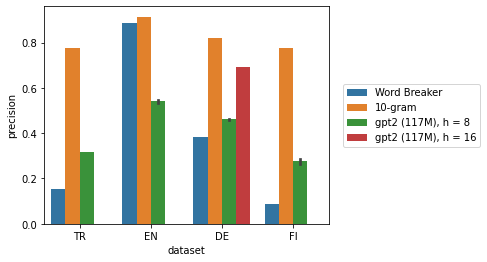

In [25]:
import seaborn as sns
g = sns.barplot(y='precision', 
            x='dataset', 
            hue='name',
            data=plot)


# resize figure box to -> put the legend out of the figure
box = g.get_position() # get position of figure
g.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
g.legend(loc='center right', bbox_to_anchor=(1.55, 0.5), ncol=1)